In [1]:
import tensorflow as tf 
tf.__version__

'2.8.0'

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1 

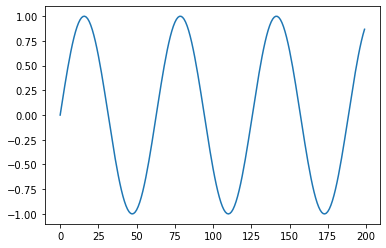

In [4]:
plt.plot(series)
# plt.show()

### Build a dataset

In [5]:
T = 10
X = []
Y = []

In [6]:
for t in range(len(series) - T):
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [7]:
X = np.array(X).reshape(-1 ,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [8]:
# linear model
i = Input(shape=(T, ))
x = Dense(1)(i)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


2022-03-14 15:15:25.504706: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(loss='mse', optimizer=Adam(lr=0.1))

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# train the model
# X:학습데이터, Y:정답데이터, epochs=80, validation_data:검증 데이터 
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 55ms/step - loss: 1.8492 - val_loss: 0.1072
Epoch 2/80
3/3 [==============================] - 0s 10ms/step - loss: 0.4633 - val_loss: 0.7505
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 0.8362 - val_loss: 0.3250
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1761 - val_loss: 0.0495
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1994 - val_loss: 0.2610
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.3340 - val_loss: 0.1154
Epoch 7/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0897 - val_loss: 0.0271
Epoch 8/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0567 - val_loss: 0.1407
Epoch 9/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1342 - val_loss: 0.0633
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0404 - val_loss: 0.0082
Epoch 11/80
3/3 [============

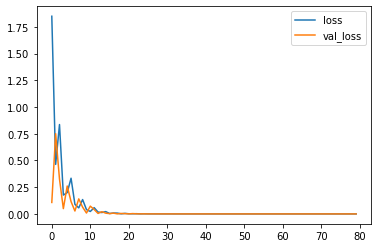

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### "Wrong" forecast usring true targets

In [12]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 
while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    validation_predictions.append(p)

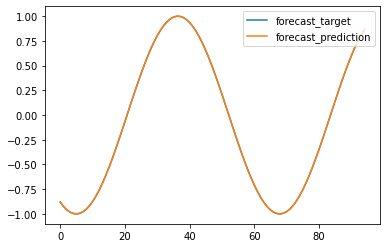

In [13]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

In [14]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input 
last_x = X[-N//2]

In [15]:
print(len(validation_target))
print(last_x)

95
[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]


In [16]:
print(last_x.reshape(1, -1))

[[-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
  -0.62507065 -0.69987469 -0.76768581 -0.82782647]]


In [17]:
print(model.predict(last_x.reshape(1, -1))[0,0])

-0.8796975


In [18]:
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

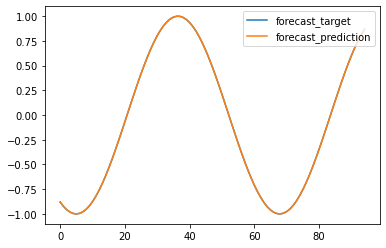

In [19]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

### Noise examples

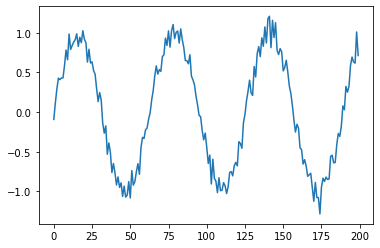

In [20]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

In [21]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t : t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [22]:
X = np.array(X).reshape(-1 ,T)
Y = np.array(Y)
N = len(X)
print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

X.shape:(190, 10), Y.shape:(190,), N.length:190


In [23]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 40ms/step - loss: 0.9466 - val_loss: 0.2226
Epoch 2/80
3/3 [==============================] - 0s 10ms/step - loss: 0.5576 - val_loss: 0.5346
Epoch 3/80
3/3 [==============================] - 0s 10ms/step - loss: 0.3236 - val_loss: 0.0854
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1331 - val_loss: 0.2248
Epoch 5/80
3/3 [==============================] - 0s 10ms/step - loss: 0.2868 - val_loss: 0.1084
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0789 - val_loss: 0.0942
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0974 - val_loss: 0.1472
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1025 - val_loss: 0.0499
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0377 - val_loss: 0.1033
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0735 - val_loss: 0.0884
Epoch 11/80
3/3 [============

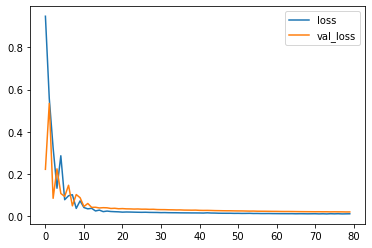

In [25]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [26]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0]
    i += 1
    
    validation_predictions.append(p)

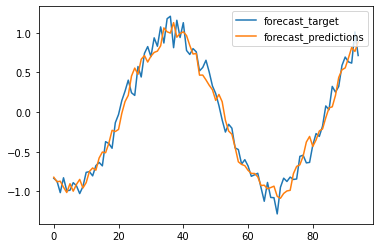

In [27]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_predictions')
plt.legend()

In [28]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

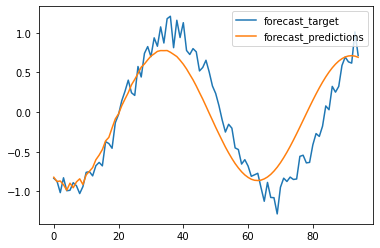

In [29]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_predictions')
plt.legend()

In [30]:
print(last_x)

[0.50496787 0.55877024 0.60530794 0.64383912 0.67398578 0.69558507
 0.70820141 0.71175647 0.7063024  0.69186425]
